In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.missing import isna
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loaner Data Set 

In the **'loan.csv'** file, we can find the loans issues througth the time period from 2007 to 2011 and i am going to use the dataset to identify the risk in lending 

### Critical case study 

If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company


If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

In [4]:
loandataset = pd.read_csv('/content/drive/MyDrive/Upgrad/Data Analysis/CaseStudy/loan.csv')

loandataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
loandataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
loandataset.shape

(39717, 115)

In [5]:
# distribution of the employment length

def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

loandataset['emp_length_num'] = loandataset['emp_length'].apply(emp_to_num)

#(loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).plot.bar()

In [6]:

#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
loandataset['loan_status_bin'] = loandataset['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [7]:
loandataset['long_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='10+ years'))
loandataset['short_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))


In [8]:
loandataset['int_rate'] = loandataset['int_rate'].str[:-1].astype(float)

In [ ]:
pd.pivot_table(loandataset, index=['term', 'loan_status'], values='id', aggfunc='count').head(10)

id
term       loan_status       
 36 months Charged Off   3227
           Fully Paid   25869
 60 months Charged Off   2400
           Current       1140
           Fully Paid    7081

In [9]:
loandataset.groupby('grade')['int_rate'].mean() 

grade
A     7.335262
B    11.021224
C    13.552960
D    15.719900
E    17.711714
F    19.749323
G    21.401044
Name: int_rate, dtype: float64

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_num,loan_status_bin,long_emp,short_emp
223,1060644,1292408,24250,18100,18075.000000,60 months,23.91,519.76,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,0.0,0,0
540,1062756,1271501,13000,13000,13000.000000,60 months,23.52,370.38,G,G3,...,0.0,0.0,NaN,NaN,NaN,NaN,10.0,NaN,1,0
601,1058624,1290219,12375,12375,12375.000000,60 months,23.13,349.79,G,G2,...,0.0,0.0,NaN,NaN,NaN,NaN,5.0,1.0,0,0
616,1061914,1293952,22400,22400,22400.000000,60 months,22.74,628.13,G,G1,...,0.0,0.0,NaN,NaN,NaN,NaN,6.0,1.0,0,0
733,1060753,1292527,24925,24925,24900.000000,60 months,23.91,715.75,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36227,417986,487603,1600,1600,1600.000000,36 months,19.16,58.78,G,G2,...,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0,0
38184,362809,372424,24000,24000,8213.723301,36 months,18.72,876.36,G,G3,...,1.0,0.0,NaN,NaN,NaN,NaN,8.0,1.0,0,0
38209,362421,371796,12500,12500,8074.432836,36 months,19.04,458.46,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,0,0
39039,277709,275527,25000,25000,7625.000000,36 months,17.34,895.56,G,G1,...,NaN,0.0,NaN,NaN,NaN,NaN,3.0,0.0,0,0


**Getting Initial Loan Analysis  Data for All Data Set  ➰**

Below chat gives an overview of Loan amount and the relationship between the Loan attribute and Indivdiual attribute

In [ ]:
#loandataset[loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])].groupby('home_ownership')['loan_status_bin'].sum().reset_index()


loandataset['installment']

#loandataset.loan_amnt

#fig, ax = plt.subplots()

#ax.hist(loandataset['loan_amnt'])

#purpose_loanstatus

#loandataset.boxplot(column='loan_status_bin', by='home_ownership')


#loandataset.groupby('verification_status')['loan_status_bin'].sum().plot.line(color='blue')

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 39717, dtype: float64

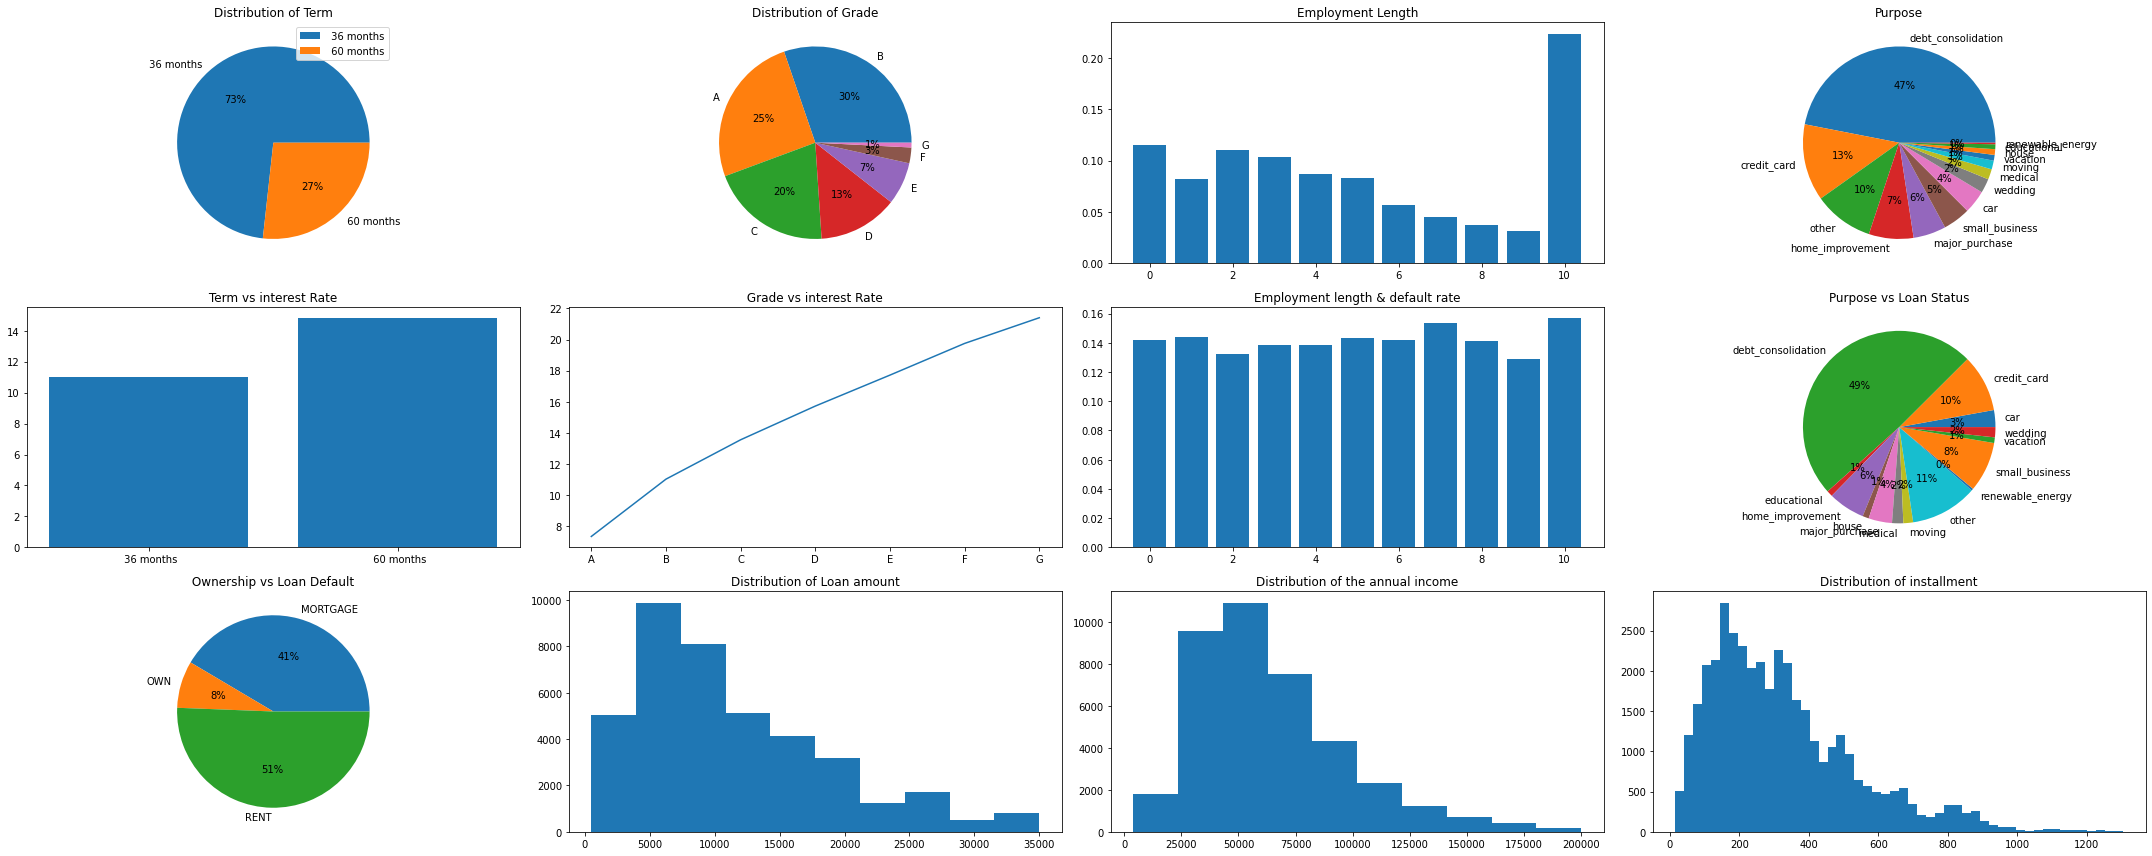

In [10]:
term_data_1 =  loandataset['term'].value_counts().reset_index()

#distribution of grades
grade_data_1 =  loandataset['grade'].value_counts().reset_index()

purpose_data_1 = loandataset['purpose'].value_counts().reset_index()
state_data_1 = loandataset['addr_state'].value_counts().reset_index()

# distribution of the employment length
employee_length_data_1 = (loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

# connection between employment length and default rate
employee_length_def_rate =  loandataset.groupby('emp_length_num')['loan_status_bin'].mean().reset_index()

# Grade vs interest Rate 
grade_vs_intrate = loandataset.groupby('grade')['int_rate'].mean().reset_index() 

# Term vs Interest 
term_vs_intrate = loandataset.groupby('term')['int_rate'].mean().reset_index() 

# Purpose vs Loan status 
purpose_loanstatus = loandataset.groupby('purpose')['loan_status_bin'].sum().reset_index() 

#owner ship vs default rate 
ownership_loanstatus = loandataset[loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])].groupby('home_ownership')['loan_status_bin'].sum().reset_index()

fig, axs  = plt.subplots(nrows = 3, ncols=4,figsize=(30,12))

#*******************************
# Term Analysis on Zero column 
#*******************************
axs[0,0].pie(term_data_1['term'], labels=term_data_1['index'],  autopct='%.0f%%')
axs[0,0].legend()
axs[0,0].set_title("Distribution of Term")

axs[1,0].bar(term_vs_intrate['term'] , term_vs_intrate['int_rate'] )
axs[1,0].set_title(" Term vs interest Rate ")

axs[2,0].pie(ownership_loanstatus['loan_status_bin'] , labels=ownership_loanstatus['home_ownership'],  autopct='%.0f%%' )
axs[2,0].set_title(" Ownership vs Loan Default ")


#*******************************
# Grade  Analysis on First  column 
#*******************************
axs[0,1].pie(grade_data_1['grade'], labels=grade_data_1['index'],  autopct='%.0f%%')
#axs[0,1].legend()
axs[0,1].set_title("Distribution of Grade")

axs[1,1].plot(grade_vs_intrate['grade'] , grade_vs_intrate['int_rate'] )
axs[1,1].set_title(" Grade vs interest Rate ")

axs[2,1].hist(loandataset.loan_amnt)
axs[2,1].set_title("Distribution of Loan amount")


#***************************************
# Employement  Analysis on Second column 
#***************************************
axs[0,2].bar(employee_length_data_1['index'] , employee_length_data_1['emp_length_num'] )
axs[0,2].set_title("Employment Length")


axs[1,2].bar(employee_length_def_rate['emp_length_num'] , employee_length_def_rate['loan_status_bin'] )
axs[1,2].set_title("Employment length & default rate")

axs[2,2].hist(loandataset[loandataset['annual_inc']<200000]['annual_inc'])
axs[2,2].set_title("Distribution of the annual income")

#***************************************
# Purpose Analysis on Third column 
#***************************************
axs[0,3].pie(purpose_data_1['purpose'], labels=purpose_data_1['index'],  autopct='%.0f%%')
axs[0,3].set_title("Purpose")

axs[1,3].pie(purpose_loanstatus['loan_status_bin'], labels=purpose_loanstatus['purpose'] ,  autopct='%.0f%%'  )
axs[1,3].set_title("Purpose vs Loan Status")


axs[2,3].hist(loandataset['installment'],bins=50)
axs[2,3].set_title("Distribution of installment")

plt.tight_layout()
plt.show()

## **Getting Initial Loan Analysis  Data for all the Charged Off Loans ⚾ **

Below chart gives an overview of Loan amount and the relationship between the Loan attribute and Indivdiual attribute for all the unpaid loan about based on **Charged off** Value 

In [27]:
# Filtering the data and only analyzing the Charged Off value

ChargedOff_loandataset =  loandataset[loandataset["loan_status"] == "Charged Off"]

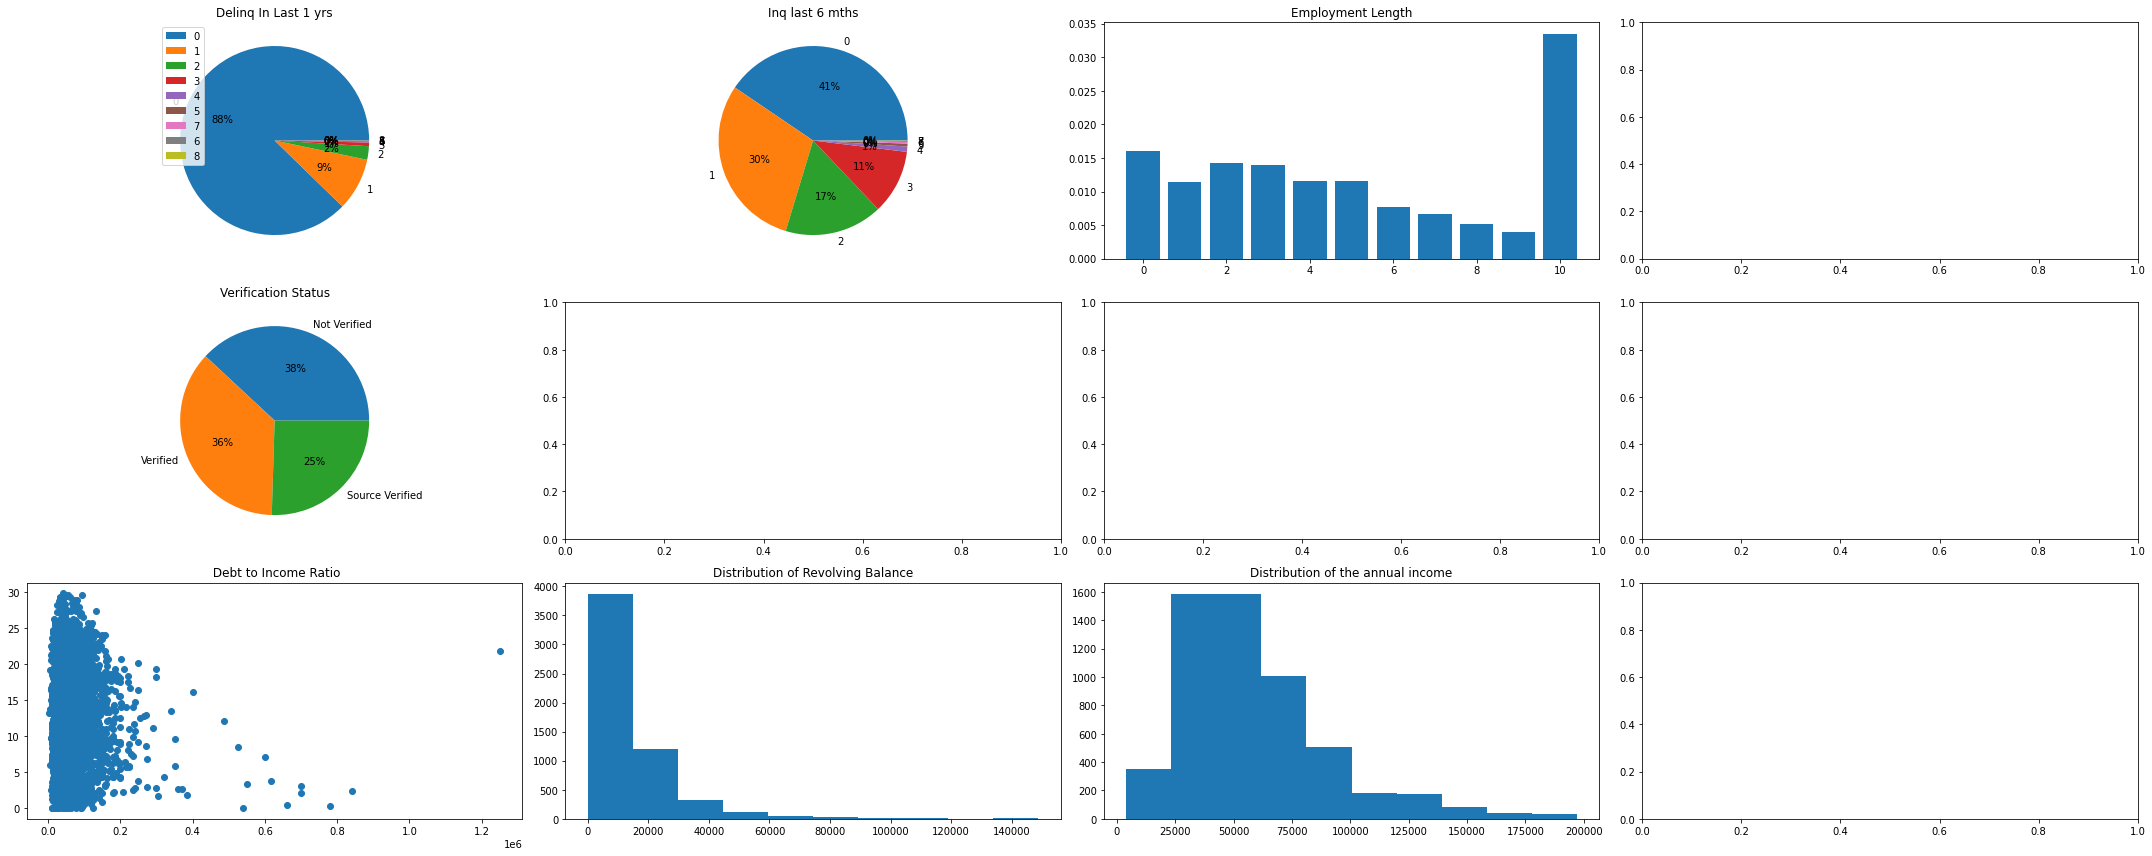

In [38]:

term_data_1 =  ChargedOff_loandataset['delinq_2yrs'].value_counts().reset_index()

#distribution of grades
grade_data_1 =  ChargedOff_loandataset['inq_last_6mths'].value_counts().reset_index()

purpose_data_1 = ChargedOff_loandataset['purpose'].value_counts().reset_index()
state_data_1 = ChargedOff_loandataset['addr_state'].value_counts().reset_index()

# Get verification status info 
verification_status  = ChargedOff_loandataset['verification_status'].value_counts().reset_index()

# distribution of the employment length
employee_length_data_1 = (ChargedOff_loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

# connection between employment length and default rate
employee_length_def_rate =  ChargedOff_loandataset.groupby('emp_length_num')['loan_status_bin'].mean().reset_index()

# Grade vs interest Rate 
#grade_vs_intrate = ChargedOff_loandataset.groupby('grade')['int_rate'].mean().reset_index() 

# Term vs Interest 
term_vs_intrate = ChargedOff_loandataset.groupby('term')['int_rate'].mean().reset_index() 

# Purpose vs Loan status 
#purpose_loanstatus = ChargedOff_loandataset.groupby('purpose')['loan_status_bin'].sum().reset_index() 

#owner ship vs default rate 
#ownership_loanstatus = ChargedOff_loandataset[loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])].groupby('home_ownership')['loan_status_bin'].sum().reset_index()

fig, axs  = plt.subplots(nrows = 3, ncols=4,figsize=(30,12))

#*******************************
#  First  column 
#*******************************
axs[0,0].pie(term_data_1['delinq_2yrs'], labels=term_data_1['index'],  autopct='%.0f%%')
axs[0,0].legend()
axs[0,0].set_title("Delinq In Last 1 yrs")

axs[1,0].pie(verification_status['verification_status'], labels=verification_status['index'],  autopct='%.0f%%')
axs[1,0].set_title("Verification Status")

axs[2,0].scatter(ChargedOff_loandataset['annual_inc'], ChargedOff_loandataset['dti'])
axs[2,0].set_title(" Debt to Income Ratio")

#axs[2,0].pie(ownership_loanstatus['loan_status_bin'] , labels=ownership_loanstatus['home_ownership'],  autopct='%.0f%%' )
#axs[2,0].set_title(" Ownership vs default rate ")


#*******************************
# Second  column 
#*******************************
axs[0,1].pie(grade_data_1['inq_last_6mths'], labels=grade_data_1['index'],  autopct='%.0f%%')
#axs[0,1].legend()
axs[0,1].set_title("Inq last 6 mths")

##sns.boxplot(data=ChargedOff_loandataset[ChargedOff_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])], x='home_ownership', y='loan_amnt', ax=axs[1,1])
##axs[1,1].set_title(" Homeownership vs loan_amnt ")

##axs[2,1].hist(ChargedOff_loandataset.loan_amnt)
##axs[2,1].set_title("Distribution of Loan amount")
axs[2,1].hist(ChargedOff_loandataset['revol_bal'])
axs[2,1].set_title("Distribution of Revolving Balance")

#***************************************
# Third Column 
#***************************************
axs[0,2].bar(employee_length_data_1['index'] , employee_length_data_1['emp_length_num'] )
axs[0,2].set_title("Employment Length")


#axs[1,2].bar(employee_length_def_rate['emp_length_num'] , employee_length_def_rate['loan_status_bin'] )
#axs[1,2].set_title("Employment length & default rate")

axs[2,2].hist(ChargedOff_loandataset[ChargedOff_loandataset['annual_inc']<200000]['annual_inc'])
axs[2,2].set_title("Distribution of the annual income")

#***************************************
# Forth  column 
#***************************************
##axs[0,3].pie(purpose_data_1['purpose'], labels=purpose_data_1['index'],  autopct='%.0f%%')
##axs[0,3].set_title("Purpose")

#axs[1,3].pie(purpose_loanstatus['loan_status_bin'], labels=purpose_loanstatus['purpose'] ,  autopct='%.0f%%'  )
#axs[1,3].set_title("Purpose vs Loan Status")


##axs[2,3].hist(ChargedOff_loandataset['installment'],bins=50)
##axs[2,3].set_title("Distribution of installment")

plt.tight_layout()
plt.show()


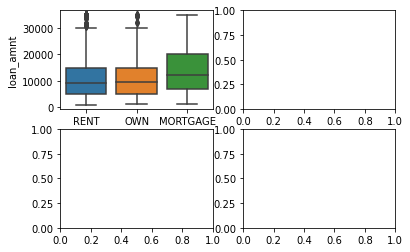

In [91]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(data=ChargedOff_loandataset[ChargedOff_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])], x='home_ownership', y='loan_amnt', ax=axes[0,0])


#axs[1,1].boxplot(ChargedOff_loandataset['loan_amnt'], ChargedOff_loandataset['home_ownership'] )

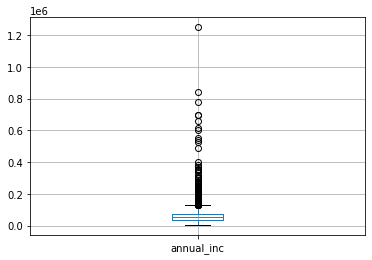

In [70]:
ChargedOff_loandataset.boxplot(column='annual_inc')

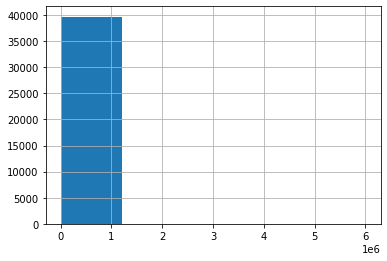

In [ ]:
loandataset["annual_inc"].hist(bins=5)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


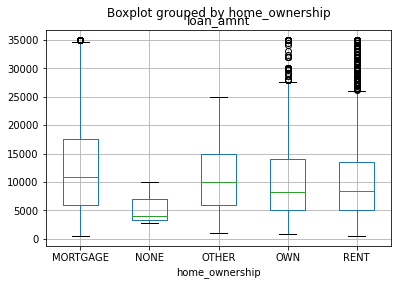

In [84]:
loandataset.boxplot(column='loan_amnt', by='home_ownership')

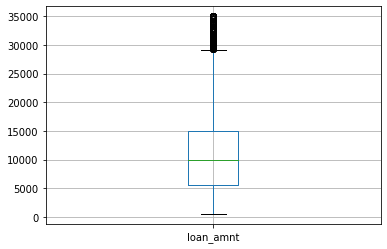

In [ ]:
loandataset.boxplot(column='loan_amnt')

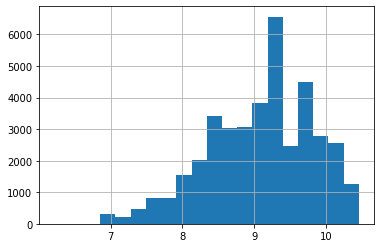

In [ ]:
loandataset["loan_amnt_log"] = np.log(loandataset["loan_amnt"])
loandataset["loan_amnt_log"].hist(bins=20)

In [ ]:
#loandataset.info(verbose=True, show_counts=True)
loandataset.isnull().sum()
obj = loandataset.isnull().sum()
for key,value in obj.iteritems():
  if(value != 0) :
    print(key,",",value)

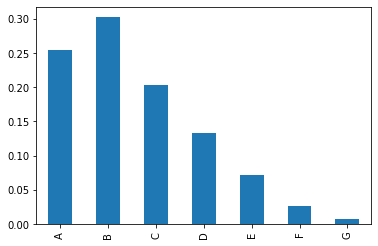

In [ ]:
#distribution of grades

(loandataset['grade'].value_counts().sort_index()/len(loandataset)).plot.bar()

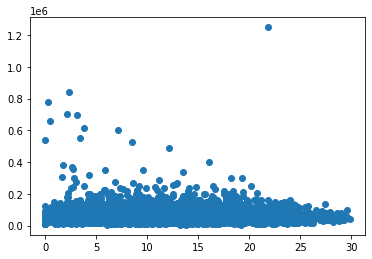

In [40]:
plt.scatter(ChargedOff_loandataset['dti'], ChargedOff_loandataset['annual_inc'])
plt.show()

In [45]:
fullypaid_loandataset =  loandataset[loandataset["loan_status"] == "Fully Paid"]


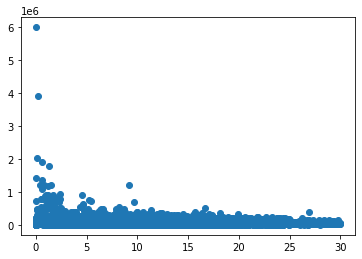

In [46]:
plt.scatter(fullypaid_loandataset['dti'], fullypaid_loandataset['annual_inc'])
plt.show()

In [ ]:
plt.scatter(ChargedOff_loandataset['dti'], ChargedOff_loandataset['annual_inc'])
plt.show()

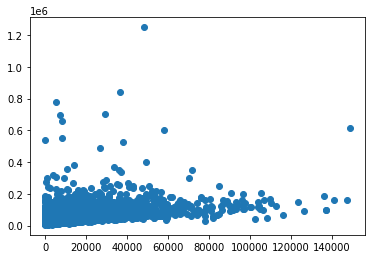

In [50]:
plt.scatter(ChargedOff_loandataset['revol_bal'], ChargedOff_loandataset['annual_inc'])
plt.show()

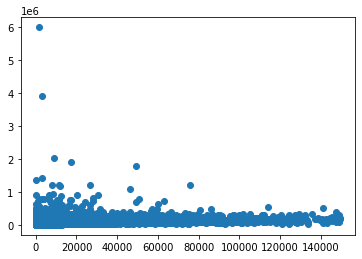

In [51]:
plt.scatter(fullypaid_loandataset['revol_bal'], fullypaid_loandataset['annual_inc'])
plt.show()

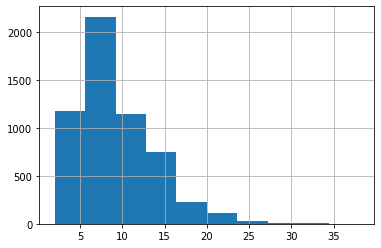

In [61]:

ChargedOff_loandataset["open_acc"].hist(bins=10)

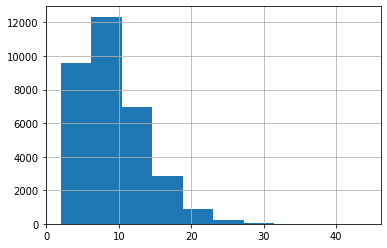

In [62]:
fullypaid_loandataset["open_acc"].hist(bins=10)

In [64]:
fullypaid_loandataset["out_prncp"].unique()

array([0.])

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(loandataset.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=df.groupby('sub_grade')['int_rate'].mean())

LinearRegression()

Text(0, 0.5, 'interest rate')

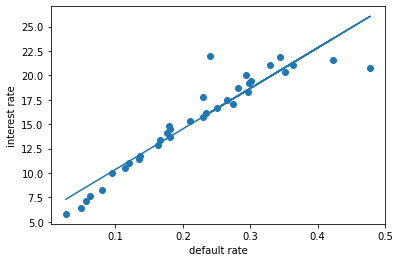

In [78]:
import matplotlib.pyplot as plt
plt.scatter(loandataset.groupby('sub_grade')['loan_status_bin'].mean(), loandataset.groupby('sub_grade')['int_rate'].mean())
plt.plot(loandataset.groupby('sub_grade')['loan_status_bin'].mean(), lr.predict(loandataset.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1)))
plt.xlabel('default rate')
plt.ylabel('interest rate')

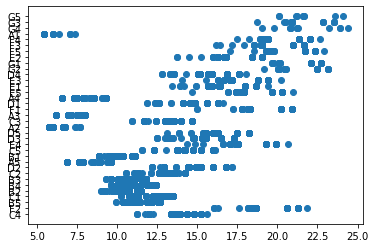

In [79]:
plt.scatter(ChargedOff_loandataset['int_rate'], ChargedOff_loandataset['sub_grade'])
plt.show()

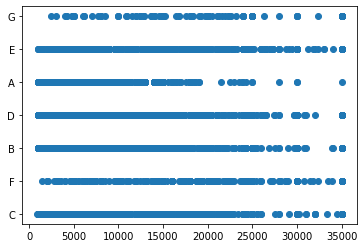

In [81]:
plt.scatter(ChargedOff_loandataset['loan_amnt'], ChargedOff_loandataset['grade'])
plt.show()

In [33]:
loandataset['last_fico_range_low']

KeyError: ignored

In [25]:
loandataset.groupby('inq_last_6mths')['loan_status'].count()

inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: loan_status, dtype: int64

In [18]:
pd.pivot_table(loandataset, index=['delinq_2yrs', 'loan_status'], values='id', aggfunc='count')

id
delinq_2yrs loan_status       
0           Charged Off   4936
            Current       1019
            Fully Paid   29450
1           Charged Off    507
            Current         96
            Fully Paid    2700
2           Charged Off    130
            Current         14
            Fully Paid     543
3           Charged Off     35
            Current          8
            Fully Paid     177
4           Charged Off     13
            Current          2
            Fully Paid      47
5           Charged Off      3
            Current          1
            Fully Paid      18
6           Charged Off      1
            Fully Paid       9
7           Charged Off      1
            Fully Paid       3
8           Charged Off      1
            Fully Paid       1
9           Fully Paid       1
11          Fully Paid       1

In [26]:
pd.pivot_table(loandataset, index=['inq_last_6mths', 'loan_status'], values='id', aggfunc='count')

id
inq_last_6mths loan_status       
0              Charged Off   2280
               Current        591
               Fully Paid   16429
1              Charged Off   1677
               Current        311
               Fully Paid    8983
2              Charged Off    943
               Current        158
               Fully Paid    4711
3              Charged Off    619
               Current         65
               Fully Paid    2364
4              Charged Off     51
               Current         10
               Fully Paid     265
5              Charged Off     28
               Current          2
               Fully Paid     116
6              Charged Off     16
               Current          1
               Fully Paid      47
7              Charged Off     10
               Current          1
               Fully Paid      24
8              Charged Off      3
               Current          1
               Fully Paid      11

In [32]:
ChargedOff_loandataset['emp_length_num'].value_counts()

10.0    1331
0.0      639
2.0      567
3.0      555
4.0      462
5.0      458
1.0      456
6.0      307
7.0      263
8.0      203
9.0      158
Name: emp_length_num, dtype: int64